<a href="https://colab.research.google.com/github/simonejiang7/bmw-case-study/blob/main/bmw_case_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utils

Before start, we put the functions in the utils section.

In [ ]:
# function to check if there are any na values in the table. If yes, print the column containing the na values.

def check_na_values(dataset,name_dataset):
  if dataset.isna().values.any():
    for col in dataset.columns:
      if dataset[col].isna().any():
        print(f"=> Column {col} in dataset {name_dataset} contains NA values")
        warnings.warn("NA values exist in the table")
  else:
    print(f"=> No NA values in the {name_dataset} table")

In [ ]:
# function to drop duplicated values if there are any.

def drop_duplicates(dataset):
  new_dataset = dataset.drop_duplicates()
  if len(new_dataset) == len(dataset):
    print("No duplicated rows are dropped")
  else:
    print("Duplicated rows are dropped")
  return new_dataset

In [ ]:
# function to print first 10 unique items in each column of the table, and the data type.

def print_unique_items(dataset):
  for col in dataset.columns:
    print(f'{col}: \n', "Unique values: ", dataset[col].unique()[:10], "\n", "Datatype:", dataset[col].dtype) 

In [ ]:
# https://neptune.ai/blog/customer-segmentation-using-machine-learning
def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(init='k-means++',  max_iter=400, random_state=42, n_clusters = c).fit(data)
        inertias.append(model.inertia_)

    return inertias

# Data Processing

## Load data

Before solving the tasks, we need to load and process data.

In [ ]:
import os
import gdown
import warnings

from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import pearsonr

Download the required data from Xuemei's shared Google Drive folder.

In [ ]:
gdown.download_folder('https://drive.google.com/drive/folders/15YypgaZyKT7ldoru5veYul04unD-aHx8?usp=share_link', quiet=True)

['/content/data/events.csv',
 '/content/data/items.csv',
 '/content/data/orders.csv',
 '/content/data/users.csv']

Get the downloaded folder path.

In [ ]:
data_path = os.path.join(os.getcwd(),'data')

Read 4 csv data files.

In [ ]:
events_path = os.path.join(data_path,'events.csv')
items_path = os.path.join(data_path,'items.csv')
orders_path = os.path.join(data_path,'orders.csv')
users_path = os.path.join(data_path,'users.csv')

In [ ]:
events = pd.read_csv(events_path)
items = pd.read_csv(items_path)
orders = pd.read_csv(orders_path)
users = pd.read_csv(users_path)

<ipython-input-8-d35eb5334132>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_path)


## Clean data

Then, we clean and process data.

### Step 1: check NA values

In [ ]:
check_na_values(events,'events')

=> No NA values in the events table


In [ ]:
check_na_values(items,'items')

=> Column adjective in dataset items contains NA values
=> Column modifier in dataset items contains NA values


<ipython-input-1-c48e8c51d3a3>:8: UserWarning: NA values exist in the table
  warnings.warn("NA values exist in the table")


In [ ]:
check_na_values(orders,'orders')

=> No NA values in the orders table


In [ ]:
check_na_values(users,'users')

=> Column deleted_at in dataset users contains NA values


<ipython-input-1-c48e8c51d3a3>:8: UserWarning: NA values exist in the table
  warnings.warn("NA values exist in the table")


=> Column merged_at in dataset users contains NA values
=> Column parent_user_id in dataset users contains NA values


From step 1, we found some NA values exist in some columns such as adjective, modifier in the items table, and deleted_at, merged_at, parent_user_id in the users table. We ignore the NA warning at the moment.

### Step 2: check duplicated values

Then, we check if there are any duplicated rows.

In [ ]:
events = drop_duplicates(events)
items = drop_duplicates(items)
orders = drop_duplicates(orders)
users = drop_duplicates(users)

No duplicated rows are dropped
No duplicated rows are dropped
No duplicated rows are dropped
No duplicated rows are dropped


No duplicated rows found. Nice.

### Step 3: check data type

First, we check the data types for each table. 

Here we select the first 10 unique values to print. In practice, this step depends on the real dataset and the need, time and effort.

In [ ]:
print_unique_items(events)

event_id: 
 Unique values:  ['b9de71c5c3cc4cd7a97e50b832106e5a' '23267713c9ea44419331731f50b6a8db'
 '1b7822fa7b854e01970218ae8f721fe0' '2a7a188a626841ac94befcc419f06af4'
 '631d657264cc4616a4528f759509b25d' '05e4df2fa9044bf9a49a7351fdd4a6cd'
 '22d3cdd566534fbdaa5e2982c1e64a75' 'cb0c825fe3804f42b602106580845b88'
 '181f7f97ab10440fb444810e085ded46' 'bbbd68b2dbd04ecabacaa00e130a52f9'] 
 Datatype: object
event_time: 
 Unique values:  ['2017-06-26 11:23:39' '2017-06-27 10:46:39' '2017-06-27 11:15:39'
 '2016-10-05 20:43:10' '2016-10-04 03:29:10' '2016-07-21 01:17:43'
 '2016-11-24 12:10:06' '2016-11-23 21:13:06' '2016-11-25 20:06:06'
 '2018-02-06 06:19:55'] 
 Datatype: object
user_id: 
 Unique values:  [178481. 154133. 119514. 164581. 232806.  90044. 221881.  73539.  72243.
 108121.] 
 Datatype: float64
event_name: 
 Unique values:  ['view_item' 'view_user_profile' 'test_assignment'] 
 Datatype: object
platform: 
 Unique values:  ['android' 'web' 'mobile web' 'iOS' 'server'] 
 Datatype: object

In [ ]:
print_unique_items(items)

adjective: 
 Unique values:  ['fuzzy' nan 'industrial-strength' 'digital' 'miniature' 'rechargable'
 'prize-winning' 'organic' 'reflective' 'aerodynamic'] 
 Datatype: object
category: 
 Unique values:  ['contraption' 'instrument' 'module' 'tool' 'device' 'mechanism' 'widget'
 'apparatus' 'gadget' 'dongle'] 
 Datatype: object
created_at: 
 Unique values:  ['2014-01-15 21:36:09' '2013-05-14 05:20:50' '2014-02-04 19:28:32'
 '2013-02-25 12:23:18' '2013-08-05 17:20:45' '2013-09-12 06:27:01'
 '2013-10-07 09:38:14' '2013-09-09 09:32:18' '2013-10-25 22:53:25'
 '2013-05-10 10:19:33'] 
 Datatype: object
id: 
 Unique values:  [2512.  482. 2446. 1312. 3556.  131. 1178.  110.   47. 1696.] 
 Datatype: float64
modifier: 
 Unique values:  ['carrying_case' 'refill' nan 'cleaner' 'how-to-manual' 'storage_unit'
 'charger' 'wrapper' 'warmer' 'opener'] 
 Datatype: object
name: 
 Unique values:  ['fuzzy contraption carrying_case' 'instrument refill'
 'industrial-strength module' 'digital tool carrying_case'

In [ ]:
print_unique_items(orders)

invoice_id: 
 Unique values:  [192320.  80902. 211144. 123735. 249245. 174993.  42209. 281648. 334281.
 290727.] 
 Datatype: float64
line_item_id: 
 Unique values:  [ 83118. 207309. 392027. 243831. 399806.  19924. 154006.  66700. 321246.
 292068.] 
 Datatype: float64
user_id: 
 Unique values:  [178481. 154133. 119514. 164581. 232806.  90044. 221881.  73539.  72243.
 108121.] 
 Datatype: float64
item_id: 
 Unique values:  [3526. 1514. 3712. 3586. 1061.  550.  982.  858. 3363. 2344.] 
 Datatype: float64
item_name: 
 Unique values:  ['digital apparatus' 'miniature apparatus cleaner' 'reflective instrument'
 'extra-strength instrument charger' 'miniature apparatus refill'
 'miniature module carrying_case' 'industrial-strength module'
 'rechargable module cleaner' 'prize-winning tool'
 'reflective mechanism carrying_case'] 
 Datatype: object
item_category: 
 Unique values:  ['apparatus' 'instrument' 'module' 'tool' 'mechanism' 'contraption'
 'gadget' 'widget' 'device' 'dongle'] 
 Datatype: 

In [ ]:
print_unique_items(users)

created_at: 
 Unique values:  ['2014-12-20 07:07:45' '2016-10-14 05:39:20' '2017-01-21 10:20:09'
 '2015-10-30 21:31:30' '2015-10-24 16:27:27' '2017-01-08 17:44:28'
 '2015-02-07 22:39:03' '2015-03-29 09:38:01' '2015-03-10 02:37:55'
 '2017-06-20 04:34:14'] 
 Datatype: object
deleted_at: 
 Unique values:  [nan '2017-12-12 20:01:26' '2017-09-14 10:50:06' '2016-06-15 06:08:06'
 '2016-03-12 03:27:55' '2016-06-25 00:58:42' '2017-01-19 04:24:56'
 '2016-10-30 12:35:55' '2014-08-30 13:19:40' '2017-02-05 01:01:47'] 
 Datatype: object
email_address: 
 Unique values:  ['ArataHopper@earthlink.info' 'Riya_Gruber1974@mail.net'
 'Peter_Sousa@yahoo.info' 'D_Kowalski1962@gmail.com' 'SNovak1966@mail.com'
 'Robot_Santos@yahoo.biz' 'Luis_Wilson1996@inbox.org'
 'D_Powell1991@yahoo.edu' 'E_Hernandez1990@gmail.biz'
 'L_McRobot@gmail.com'] 
 Datatype: object
first_name: 
 Unique values:  ['Arata' 'Riya' 'Peter' 'D' 'S' 'Robot' 'Luis' 'E' 'L' 'F'] 
 Datatype: object
id: 
 Unique values:  [ 51590. 158891. 179949.

# Task 1

Now we can solve the problems step by step.

## 1.1 Data Description

Question: Describe the datasets and the eventual anomalies you find.

  -----

Event Table: 

The table describes 3 types of events, including view_item, view_user_profile and test_assignment by different users. The `event_id` and time stamp(`event_time`) specifies the uniqueness of the event and the `user_id` specifies the unique identify of the user. The `platfrom` column indicates different platforms, including android, web, mobile web, iOS and server. 

However, the `parameter_name` and `paramter_value` are ambiguous. We found in the events table, there are multiple lines with the same `event_id`, `event_time`, `user_id`, `event_name`, `platform` but different` parameter_name` and `parameter_value`. Therefore, we reshape the table with `pivot` function to make the table easier to read while ensuring there are no duplicated `event_id`s.

In [ ]:
if len(events['event_id'].unique()) != len(events['event_id']):
  events = events.pivot(index=['event_id', 'event_time', 'user_id', 'event_name','platform'],
                    columns='parameter_name',
                    values='parameter_value').reset_index()
assert len(events) == len(events['event_id'].unique()) # make sure there are no duplicated events

The `parameter_name` are divided into columns of `item_id`,` referrer`, `test_assignment`, `test_id` and `viewed_user_id`, which are associated with different events.

*   test_assignment: `test_assignment`, `test_id`
*   view_item: `item_id`,`referrer`
*   view_profile: `view_user_profile`

Then we change the data type of the new columns so that the table is able to be merged with other tables.

In [ ]:
events['item_id'] = events['item_id'].map(lambda x:float(x) if pd.notna(x) else x)
events['test_assignment'] = events['test_assignment'].map(lambda x:bool(int(x)) if pd.notna(x) else x)
events['test_id'] = events['test_id'].map(lambda x:float(x) if pd.notna(x) else x)
events['viewed_user_id'] = events['viewed_user_id'].map(lambda x:float(x) if pd.notna(x) else x)

It seems the columns of test_assignment is unnecessary. However, before we remove this column, we check if it is consistent with the condition that event_name == test_assignment.

In [ ]:
event_test_assign = events[events['event_name'] == 'test_assignment']
event_test_assign['test_assignment'].unique()

array([True, False], dtype=object)

The result shows that there is a mismatch between the event test_assignment and column test_assignment. In the test_assignment event, the column of test_assignment is not always True.

Therefore, we create a TODO here: double check the original event dataset.

Similarly, we check if there are any anomalities in other events.

In [ ]:
event_view_item = events[events['event_name'] == 'view_item']
event_view_item['item_id'].isna().unique()

array([False])

For the view_id event, there is no NA values in the item_id column. Therefore, it seems there is no anomality for this event.

In [ ]:
event_view_profile = events[events['event_name'] == 'view_user_profile']
event_view_profile['viewed_user_id'].isna().unique()

array([False])

Similarly for the view_user_profile event, no anomality.

We get the summary of the events table

In [ ]:
events.info

<bound method DataFrame.info of parameter_name                          event_id           event_time  \
0               00003d71b9cb41469c05af608a6d2145  2014-04-28 15:23:00   
1               00009c5122b04bc09d7677b5bae641c8  2017-10-06 14:33:32   
2               0000ac00b5b741a8928a911dc3448cb2  2014-07-25 22:40:56   
3               00012e89e2f54bf99180dde02c63e4ad  2016-11-06 15:23:09   
4               00012e8f6da84f33ab9ff53901f5a2f3  2014-04-10 15:23:05   
...                                          ...                  ...   
428359          ffff62bdd4ed4594873f535871ec774a  2014-06-25 15:23:05   
428360          ffff6b68428a40468e7c5e5b2d3ea3b7  2013-11-20 15:23:00   
428361          ffff7a00a5034c1da51a6dc6d6e9e94b  2014-04-28 15:23:05   
428362          ffff8b1919e14d19b3744a49f682dafd  2016-11-16 15:23:09   
428363          ffff9476a6624306968e30835419729e  2016-11-25 15:23:09   

parameter_name   user_id       event_name    platform  item_id       referrer  \
0         

  -----

Items table: 

Items table includes the information related to the items. The columns include adjective, category, created_at, item_io, modifier, name, price. 

First of all, we rename the column id to item_id to match with the other tables.

In [ ]:
items = items.rename(columns = {'id':'item_id'})

In [ ]:
items.info

<bound method DataFrame.info of                 adjective     category           created_at  item_id  \
0                   fuzzy  contraption  2014-01-15 21:36:09   2512.0   
1                     NaN   instrument  2013-05-14 05:20:50    482.0   
2     industrial-strength       module  2014-02-04 19:28:32   2446.0   
3                 digital         tool  2013-02-25 12:23:18   1312.0   
4               miniature       device  2013-08-05 17:20:45   3556.0   
...                   ...          ...                  ...      ...   
2193        prize-winning    apparatus  2013-08-13 04:14:14   3952.0   
2194                fuzzy       dongle  2014-01-16 00:58:43    432.0   
2195  industrial-strength       dongle  2013-12-18 21:37:01   1393.0   
2196            miniature       device  2013-11-27 14:14:47    425.0   
2197                  NaN       widget  2013-10-10 21:13:50    325.0   

           modifier                               name  price  
0     carrying_case    fuzzy contraptio

  -----

Orders table:

This table includes the orders information. 

We change the datatype of column `created_at` and `paid_at` to pd datetime.

In [ ]:
orders['created_at'] = pd.to_datetime(orders['created_at'])
orders['paid_at'] = pd.to_datetime(orders['paid_at'])

In [ ]:
orders.info

<bound method DataFrame.info of        invoice_id  line_item_id   user_id  item_id  \
0        192320.0       83118.0  178481.0   3526.0   
1        192320.0      207309.0  178481.0   1514.0   
2        192320.0      392027.0  178481.0   3712.0   
3         80902.0      243831.0  154133.0   3586.0   
4         80902.0      399806.0  154133.0   1061.0   
...           ...           ...       ...      ...   
47397    122276.0       56104.0   92447.0    801.0   
47398    348144.0      162528.0  151538.0   3729.0   
47399    348144.0      321219.0  151538.0   1645.0   
47400    348144.0      264112.0  151538.0   2084.0   
47401    348144.0       58354.0  151538.0   2681.0   

                               item_name item_category    price  \
0                      digital apparatus     apparatus  330.000   
1            miniature apparatus cleaner     apparatus   99.000   
2            miniature apparatus cleaner     apparatus   99.000   
3                  reflective instrument    instrum

It might worth mentioning that the mean value for the price column is 0, which means some items are free.

In [ ]:
orders['price'].describe()

count    47402.000000
mean       101.819611
std        163.177568
min          0.000000
25%         13.750000
50%         42.000000
75%        120.000000
max       2250.000000
Name: price, dtype: float64

  -----

Users table:

The table stores the user information, including creation timestamp (`created_at`), deletion timestamp(`deleted_at`), `email_address`, `first_name`, user id(`id`), `last_name`, `merged_at`,` parent_user_id`.

To make the table mergable with other tables, we rename the` id` to `user_id`.

In [ ]:
users = users.rename(columns = {'id':'user_id'})

In [ ]:
users.head(5)

,created_at,deleted_at,email_address,first_name,user_id,last_name,merged_at,parent_user_id
0,2014-12-20 07:07:45,NaN,ArataHopper@earthlink.info,Arata,51590.0,Hopper,NaN,NaN
1,2016-10-14 05:39:20,NaN,Riya_Gruber1974@mail.net,Riya,158891.0,Gruber,NaN,NaN
2,2017-01-21 10:20:09,NaN,Peter_Sousa@yahoo.info,Peter,179949.0,Sousa,NaN,NaN
3,2015-10-30 21:31:30,NaN,D_Kowalski1962@gmail.com,D,98000.0,Kowalski,NaN,NaN
4,2015-10-24 16:27:27,NaN,SNovak1966@mail.com,S,93994.0,Novak,NaN,NaN


## Task 1.2 Popular items

Question: What are the most popular items in the store catalog? Can you provide a list of the top 10 items ordered by customers?

### Merge orders and items table

To do the required analysis, we need to create a new table called `orders_items` by merging the `orders` table and the `items` table.

For the items table, we merge the columns except for created_at (not needed) and price (price is the duplicated column).

In [ ]:
orders_items = pd.merge(orders, items.iloc[:, [0,1,3,4,5]], how = 'left', on = 'item_id')

The first 5 rows of the new table is shown below.

In [ ]:
orders_items.head(5)

,invoice_id,line_item_id,user_id,item_id,item_name,item_category,price,created_at,paid_at,adjective,category,modifier,name
0,192320.0,83118.0,178481.0,3526.0,digital apparatus,apparatus,330.0,2017-06-28 21:14:25,2017-06-27 21:19:39,digital,apparatus,NaN,digital apparatus
1,192320.0,207309.0,178481.0,1514.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39,miniature,apparatus,cleaner,miniature apparatus cleaner
2,192320.0,392027.0,178481.0,3712.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39,miniature,apparatus,cleaner,miniature apparatus cleaner
3,80902.0,243831.0,154133.0,3586.0,reflective instrument,instrument,57.2,2016-10-09 06:57:30,2016-10-07 10:08:10,reflective,instrument,NaN,reflective instrument
4,80902.0,399806.0,154133.0,1061.0,extra-strength instrument charger,instrument,17.6,2016-10-09 06:57:30,2016-10-07 10:08:10,extra-strength,instrument,charger,extra-strength instrument charger


### Count popularity

We are able to count the number of purchase for each item, which indicates the popularity of the item.

In [ ]:
items_popularity = orders_items.groupby(['item_id'])['invoice_id'].count().reset_index()
items_popularity = items_popularity.rename(columns = {'invoice_id':'purchased_times_count'})

Then, we sort the table with popularity

In [ ]:
items_popularity_sorted = items_popularity.sort_values('purchased_times_count', ascending = False)

In [ ]:
items_popularity_sorted.head(5)

,item_id,purchased_times_count
1921,3486.0,40
928,1679.0,39
623,1119.0,38
996,1812.0,37
2052,3733.0,36


### Most popular item

In [ ]:
most_popular_itemid = items_popularity_sorted.values[0][0]
most_popular_item = items['name'][items['item_id'] == most_popular_itemid]

In [ ]:
print("The most popular item's id is: ",most_popular_itemid, "and the item name is ", str(most_popular_item.values[0]))

The most popular item's id is:  3486.0 and the item name is  extra-strength tool opener


In [ ]:
top_10_item_id = items_popularity_sorted.iloc[0:10,0].values.tolist()
top_10_items_df = items[items['item_id'].isin(top_10_item_id)]
top_10_items_df['item_id'] = pd.Categorical(top_10_items_df['item_id'], categories=top_10_item_id, ordered=True)
top_10_items_df = top_10_items_df.sort_values('item_id')
top_10_item_names = top_10_items_df['name'].values.tolist()

In [ ]:
print("The top 10 items' id are: ", top_10_item_id)

The top 10 items' id are:  [3486.0, 1679.0, 1119.0, 1812.0, 3733.0, 730.0, 3455.0, 2647.0, 3033.0, 2408.0]


In [ ]:
print("The top 10 items are: ", top_10_item_names )

The top 10 items are:  ['extra-strength tool opener', 'matte apparatus wrapper', 'rechargable apparatus carrying_case', 'analog gadget cleaner', 'glossy module storage_unit', 'organic apparatus carrying_case', 'organic apparatus', 'extra-strength widget', 'widget opener', 'matte mechanism how-to-manual']


In [ ]:
# pd.merge(orders_items, purchased_items, how = 'left', on = 'item_id').sort_values('purchased_count',ascending = False)

In [ ]:
# sorted_itemid_popularity  = orders_items['item_id'].value_counts().to_frame().index
# sorted_count_item = orders_items['item_id'].value_counts().to_frame()

In [ ]:
# sorted_count_item

In [ ]:
# sorted_itemid_popularity

In [ ]:
# items['item_id'] = pd.Categorical(items['item_id'], categories=sorted_itemid_popularity, ordered=True)
# items = items.sort_values('item_id')

In [ ]:
# items.head(5)

In [ ]:
# most_popular_item = items.iloc[0,:]
# most_popular_item

## Task 1.3

Question: What is the overall revenue generated by the orders in the dataset? How does the revenue vary by time period ?

### Overall revenue

Calculating overall revenue is simple, since each invoice_id is unique, and the orders table did not specify the number of items to be purchased, we assume for each invoice, only 1 item was purchased.

Therefore, we simply sum the price of the orders, and will be able to gain the revenue.

In [ ]:
orders.head(5)

,invoice_id,line_item_id,user_id,item_id,item_name,item_category,price,created_at,paid_at
0,192320.0,83118.0,178481.0,3526.0,digital apparatus,apparatus,330.0,2017-06-28 21:14:25,2017-06-27 21:19:39
1,192320.0,207309.0,178481.0,1514.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39
2,192320.0,392027.0,178481.0,3712.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39
3,80902.0,243831.0,154133.0,3586.0,reflective instrument,instrument,57.2,2016-10-09 06:57:30,2016-10-07 10:08:10
4,80902.0,399806.0,154133.0,1061.0,extra-strength instrument charger,instrument,17.6,2016-10-09 06:57:30,2016-10-07 10:08:10


In [ ]:
overall_revenue = orders['price'].sum()

In [ ]:
print("The overall revenue is : ", overall_revenue)

The overall revenue is :  4826453.21


### Revenue vary by period

We are able to calculate revenues by days, months as well as years using the `paid_at` timestamp.

Revenue by days.

In [ ]:
orders_date = orders.groupby([orders['paid_at'].dt.date]).sum()

<ipython-input-117-5b47a80187b1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders_date = orders.groupby([orders['paid_at'].dt.date]).sum()


In [ ]:
orders_date = orders_date.sort_values('price', ascending = False)
orders_date = orders_date.rename(columns = {'price':'revenue'})

In [ ]:
orders_date

,invoice_id,line_item_id,user_id,item_id,revenue
paid_at,,,,,
2017-10-07,9197915.0,9167912.0,10189251.0,103958.0,10865.370
2017-05-07,12462511.0,11967960.0,10987381.0,128982.0,10474.335
2018-05-20,11909086.0,13005716.0,16769949.0,124007.0,10075.170
2017-11-11,9405247.0,8581094.0,10102909.0,90924.0,9497.535
2017-06-08,11578840.0,11362080.0,12200769.0,132361.0,9254.000
...,...,...,...,...,...
2013-10-24,156438.0,701189.0,9404.0,2704.0,9.000
2013-07-06,646500.0,779127.0,2169.0,2597.0,8.640
2015-06-22,181285.0,337922.0,61739.0,3415.0,6.250


Revenue by months.

In [ ]:
orders_month = orders.groupby([orders['paid_at'].dt.to_period('M')]).sum()

<ipython-input-126-5592369b1185>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders_month = orders.groupby([orders['paid_at'].dt.to_period('M')]).sum()


In [ ]:
orders_month = orders_month.sort_values('price', ascending = False)
orders_month = orders_month.rename(columns = {'price':'revenue'})

In [ ]:
orders_month

,invoice_id,line_item_id,user_id,item_id,revenue
paid_at,,,,,
2017-06,241737291.0,240535437.0,233148071.0,2410429.0,133966.520
2018-01,269727446.0,257669312.0,305593380.0,2553659.0,130394.610
2018-03,246992731.0,244992505.0,316178936.0,2530302.0,128172.145
2017-11,257051042.0,246970376.0,279766910.0,2489280.0,127646.690
2018-02,232358663.0,242845018.0,293014351.0,2407665.0,125545.345
...,...,...,...,...,...
2013-06,12586757.0,12526599.0,92918.0,125720.0,6476.530
2018-06,11140138.0,11567933.0,17315116.0,135275.0,6145.505
2013-05,10241600.0,8273776.0,28276.0,82165.0,3590.445


Revenue by year.

In [ ]:
orders_year = orders.groupby([orders['paid_at'].dt.year]).sum()

<ipython-input-130-138835ecd530>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders_year = orders.groupby([orders['paid_at'].dt.year]).sum()


In [ ]:
orders_year = orders_year.sort_values('price', ascending = False)
orders_year = orders_year.rename(columns = {'price':'revenue'})

In [ ]:
orders_year

,invoice_id,line_item_id,user_id,item_id,revenue
paid_at,,,,,
2017,2.703536e+09,2.712902e+09,2.663065e+09,27111176.0,1423083.175
2016,2.342728e+09,2.324531e+09,1.440234e+09,23171220.0,1160520.170
2015,1.797428e+09,1.815165e+09,5.918333e+08,17763447.0,902359.045
2018,1.255122e+09,1.250991e+09,1.578648e+09,12527830.0,638719.800
2014,1.128273e+09,1.134362e+09,1.376023e+08,11323209.0,565753.425
2013,2.576674e+08,2.687344e+08,6.185989e+06,2746365.0,136017.595


Finally, we are able to visulaize the revenues histograms.

In [ ]:
revenue_day = orders_date['revenue'].tolist()
revenue_month = orders_month['revenue'].tolist()
revenue_year= orders_year['revenue'].tolist()

In [ ]:
dates = orders_date.index
months = orders_month.index.to_timestamp()
years = pd.to_datetime(orders_year.index, format='%Y')

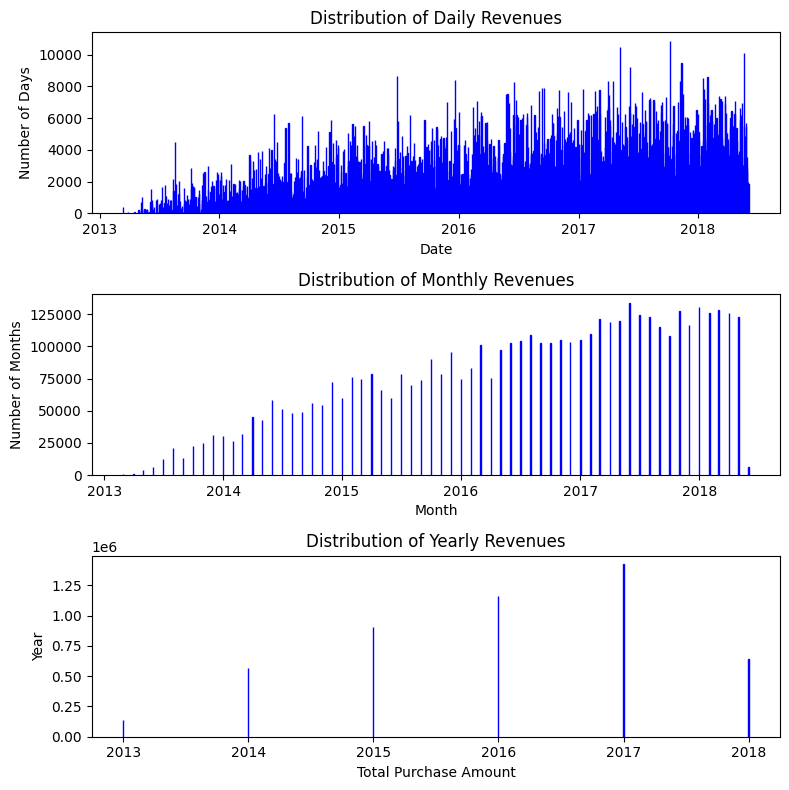

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(8, 8)) 

axs[0].bar(dates, revenue_day, edgecolor='blue')
axs[0].set_title('Distribution of Daily Revenues')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Number of Days')

axs[1].bar(months, revenue_month, edgecolor='blue')
axs[1].set_title('Distribution of Monthly Revenues')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Months')

axs[2].bar(years, revenue_year, edgecolor='blue')
axs[2].set_title('Distribution of Yearly Revenues')
axs[2].set_xlabel('Total Purchase Amount')
axs[2].set_ylabel('Year')

fig.tight_layout()

plt.show()

We observe an increasing trend of revenues. The revenue data in 2018 might be not complete.

It might be worth to take a look at the monthly trends as well.

In [ ]:
orders_month_only = orders.groupby([orders['paid_at'].dt.month]).sum()
orders_month_only = orders_month_only.rename(columns = {'price':'revenue'})

<ipython-input-193-5eed2c42c8de>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders_month_only = orders.groupby([orders['paid_at'].dt.month]).sum()


In [ ]:
revenue_month_only = orders_month_only['revenue'].tolist()

Text(0, 0.5, 'Revenues')

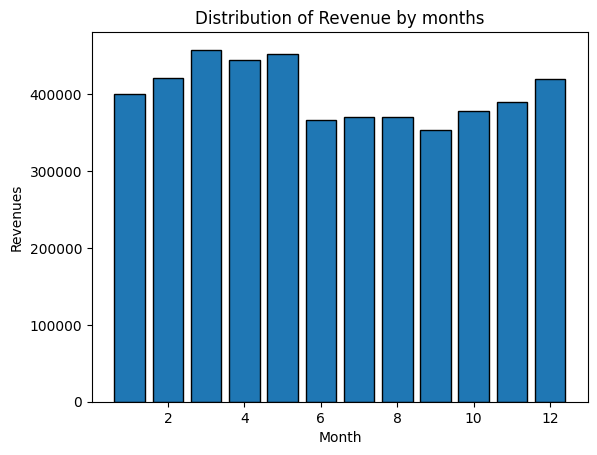

In [ ]:
plt.bar(orders_month_only.index, revenue_month_only, edgecolor='black')
plt.title('Distribution of Revenue by months')
plt.xlabel('Month')
plt.ylabel('Revenues')

It seems the store has a higher revenue in Q1, but such conclusion needs further analysis, such as doing a significance test.

## Task 1.4

Question: Which general patterns do you find in the purchasing behavior of the customers?

First of all, we anlayze how many of registered users has purchased something. We find that aroung 15% of users have records of purchase.

In [ ]:
print("The percentage of users making purchase is: ", len(orders['user_id'].unique())/len(users['user_id'].unique()))

The percentage of users making purchase is:  0.1490296813395006


To further analyze the users' purchasing behavior, we make a new table combining the users with the amount of purchase they've made. In other words, we analyze the 15% users who have purchased something.

In [ ]:
users_purchase = orders.groupby(['user_id'])['price'].sum().reset_index()
users_purchase = users_purchase.rename(columns = {'price':'purchase'})

In [ ]:
# users_purchase['purchase'].sort_values(ascending=False)

In [ ]:
purchase = users_purchase['purchase'].tolist()
purchase_weight =  np.ones_like(purchase) / len(purchase)

Text(0, 0.5, 'Number of Users')

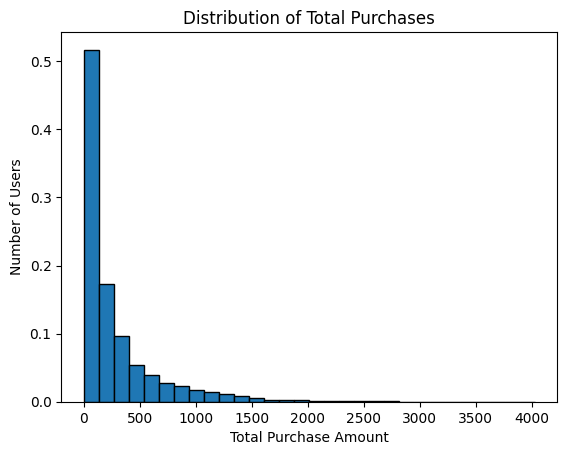

In [ ]:
plt.hist(purchase, bins=30, weights=purchase_weight, edgecolor='black')
plt.title('Distribution of Total Purchases')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Number of Users')

Fron the firgure, we are able to observer that, the distribution of purchase amount is very unbalanced. It seems most of purchase amount are below 2000 for the users.

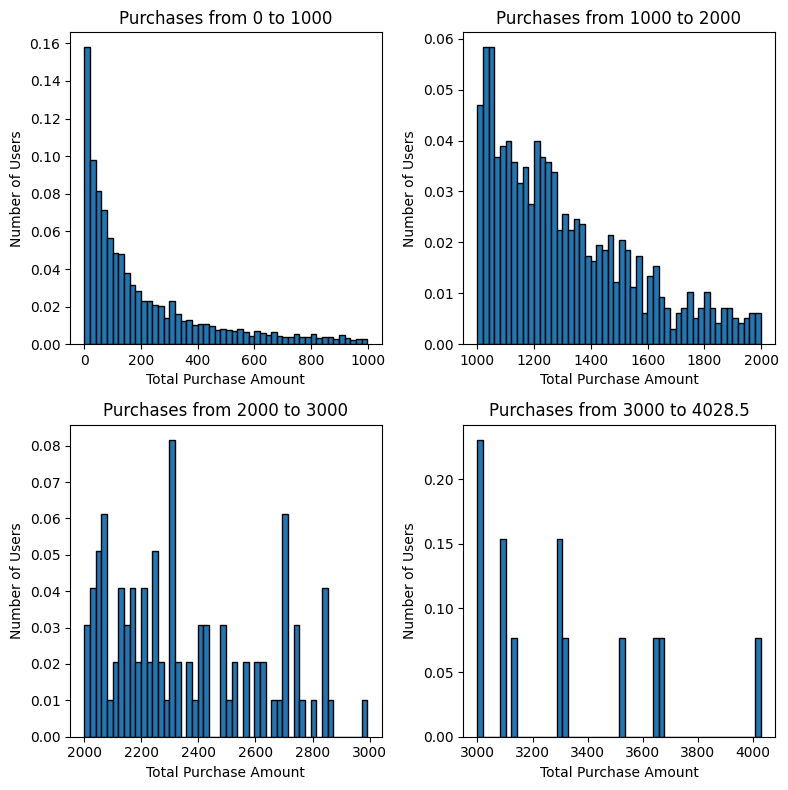

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
ranges = [(0, 1000), (1000, 2000), (2000, 3000), (3000, max(purchase) + 1)]
filtered_len = []

for ax, (min_val, max_val) in zip(axs.flatten(), ranges):
  
    filtered_values = [value for value in purchase if min_val <= value < max_val]
    filtered_len.append(len(filtered_values))
    weights = np.ones_like(filtered_values) / len(filtered_values)
    ax.hist(filtered_values, weights=weights, bins=50, edgecolor='black')
    
    ax.set_title(f'Purchases from {min_val} to {max_val}')
    ax.set_xlabel('Total Purchase Amount')
    ax.set_ylabel('Number of Users')

plt.tight_layout()
plt.show()

From the tables, we are able to see, with larger purchase amount, there are less users.


The distribution of users among the four sections are unbalanced. We assume purchases from 0 to 1000 as section 1, ...., purchases larger than 3000 as section 4.

In [ ]:
for i, len in enumerate(filtered_len):
  print(f"Percentage of users in section {i}: {len / sum(filtered_len)}")

Percentage of users in section 0: 0.9376968447574873
Percentage of users in section 1: 0.05594685907346962
Percentage of users in section 2: 0.005611865086182214
Percentage of users in section 3: 0.0007444310828609059


To increase the purchase amount of users, there are three strategies:


1.   Aim for users who joined but not purhcased (~85% users)
2.   Aim for users who purchased but small amount (~14% users)
3.   Aim for users who purchased large amount (~1% users)

There could be some trade-offs between the strategies.



## Task 1.5

Question: 

Split customers into different groups based on their purchasing behavior.


*   Justify your choice for your adopted method(s) and model(s).
*   Describe the defined customer groups.
*   What are the features which are driving the differentiation amongst the different groups?
*   Give suggestions on how the business should treat these clusters differently.
*  Which clusters seem to have the highest ROI ? 





This is a customer segmentation problem. Here we use k-means clustering to do the segmentation, the reasons are as follow:


1.   We don't have any labels for the customers, and therefore we can only do unsupervised learning.
2.   K-means clustering is a good clustering method especially for low-dimensional data. In our case, the user data has less than 5 features, and therefore it could be an appropriate approach to differentiate the customer gorups.

There are also other methods such as hierarchical clustering or RFM analysis that can be applied in this case.




First of all, we anlayze the items by combining purchasing behavior from the events table with the items table.

In [ ]:
items_viewed = events['item_id'].value_counts().reset_index()
items_viewed = items_viewed.rename(columns = {'index':'item_id', 'item_id':'items_viewed_count'})

In [ ]:
new_items = pd.merge(items,items_popularity,how = 'left', on = 'item_id')

In [ ]:
new_items = pd.merge(new_items,items_viewed,how = 'left', on = 'item_id')

In [ ]:
new_items.head(5)

,adjective,category,created_at,item_id,modifier,name,price,purchased_times_count,items_viewed_count
0,fuzzy,contraption,2014-01-15 21:36:09,2512.0,carrying_case,fuzzy contraption carrying_case,150.0,18,123
1,NaN,instrument,2013-05-14 05:20:50,482.0,refill,instrument refill,35.2,14,99
2,industrial-strength,module,2014-02-04 19:28:32,2446.0,NaN,industrial-strength module,300.0,28,123
3,digital,tool,2013-02-25 12:23:18,1312.0,carrying_case,digital tool carrying_case,16.5,20,132
4,miniature,device,2013-08-05 17:20:45,3556.0,cleaner,miniature device cleaner,16.5,20,125


There might be some relationship betwen purchased_times_count and items_viewed_count, and therefore we calucate the Pearson correlation between these two variables.

In [ ]:
corr, _ = pearsonr(new_items['purchased_times_count'], new_items['items_viewed_count'])
print('Pearsons correlation:', corr)

Pearsons correlation: 0.46715201578012827


Then we plot these two variables

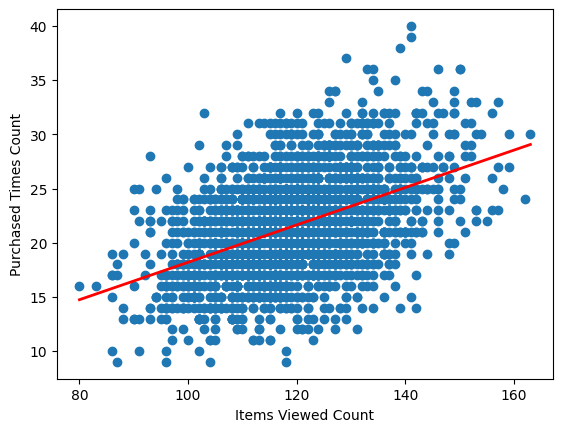

In [ ]:
plt.scatter(new_items['items_viewed_count'], new_items['purchased_times_count'])

coeffs = np.polyfit(new_items['items_viewed_count'], new_items['purchased_times_count'], 1)
f = np.poly1d(coeffs)
x = np.linspace(min(new_items['items_viewed_count']), max(new_items['items_viewed_count']))


plt.plot(x, f(x), color='red', linewidth=2)
plt.xlabel('Items Viewed Count')
plt.ylabel('Purchased Times Count')
plt.show()

We find there is a positive correlation between the count of purchased times and the count of viewed times.

Then we do the k means clustering for the customers

In [ ]:
# orders_items.head()

We create a new temp table for users and the count for their viewed items from the events table.

In [ ]:
user_view_item = events.groupby(['user_id'])['item_id'].count().reset_index()
user_view_item = user_view_item.rename(columns = {'item_id':'view_items'})

Similarly, we create a temp table for users and the count for their viewed users. This variable is to find out any malicious users who's aiming for information of the other users but not shopping items.

In [ ]:
user_view_user =  events.groupby(['user_id'])['viewed_user_id'].count().reset_index()
user_view_user = user_view_user.rename(columns = { 'viewed_user_id':'view_users'})

Finally, we create a temp table to add a variable indciating the count of the user to be viewed by the other users.

In [ ]:
users_be_viewed = events.groupby(['viewed_user_id'])['user_id'].count().reset_index()
users_be_viewed = users_be_viewed.rename(columns = {'viewed_user_id':'user_id','user_id':'viewed_by_users'})

Then we merge all user tables

In [ ]:
new_users = pd.merge(users,users_purchase, how = 'outer', on = 'user_id')
new_users = pd.merge(new_users,user_view_item, how = 'left', on = 'user_id')
new_users = pd.merge(new_users,user_view_user, how = 'left', on = 'user_id')
new_users = pd.merge(new_users, users_be_viewed,  how = 'left', on = 'user_id')

In [ ]:
new_users.describe()

,user_id,parent_user_id,purchase,view_items,view_users,viewed_by_users
count,117178.000000,6408.000000,17463.000000,109624.000000,109624.000000,2968.000000
mean,147197.210398,128196.083958,276.381676,2.397158,0.028169,1.015499
std,85398.868586,75582.066471,383.592673,2.663571,0.168353,0.123546
min,4.000000,205.000000,0.000000,0.000000,0.000000,1.000000
25%,73582.250000,63482.750000,43.200000,0.000000,0.000000,1.000000
50%,146476.500000,127100.000000,126.000000,2.000000,0.000000,1.000000
75%,220646.750000,191184.000000,338.280000,4.000000,0.000000,1.000000
max,299977.000000,295714.000000,4027.500000,24.000000,2.000000,2.000000


And replace NA values with 0

In [ ]:
new_users = new_users.fillna({'purchase':0, 'view_items': 0, 'view_users': 0, 'viewed_by_users': 0})

The average purchase number for all users are 41.189073.

In [ ]:
new_users_active = new_users[new_users['purchase'] != 0]

In [ ]:
new_users_active.describe()

,user_id,parent_user_id,purchase,view_items,view_users,viewed_by_users
count,17169.000000,969.000000,17169.000000,17169.000000,17169.000000,17169.000000
mean,135658.508183,124728.035088,281.114404,4.693459,0.025511,0.026385
std,79241.902314,73971.679241,385.139762,2.823333,0.159877,0.162088
min,17.000000,212.000000,0.330000,1.000000,0.000000,0.000000
25%,66874.000000,60898.000000,46.000000,3.000000,0.000000,0.000000
50%,134068.000000,120437.000000,130.000000,4.000000,0.000000,0.000000
75%,203261.000000,186121.000000,346.375000,6.000000,0.000000,0.000000
max,296956.000000,288374.000000,4027.500000,24.000000,2.000000,2.000000


In [ ]:
new_users_active

,created_at,deleted_at,email_address,first_name,user_id,last_name,merged_at,parent_user_id,purchase,view_items,view_users,viewed_by_users
1,2016-10-14 05:39:20,NaN,Riya_Gruber1974@mail.net,Riya,158891.0,Gruber,NaN,NaN,1086.000,7.0,0.0,0.0
4,2015-10-24 16:27:27,NaN,SNovak1966@mail.com,S,93994.0,Novak,NaN,NaN,315.000,3.0,0.0,0.0
7,2015-03-29 09:38:01,NaN,D_Powell1991@yahoo.edu,D,64712.0,Powell,NaN,NaN,36.000,4.0,0.0,0.0
12,2017-04-12 23:16:55,NaN,Grace_Kumar@gmail.com,Grace,196712.0,Kumar,NaN,NaN,1643.750,4.0,1.0,0.0
15,2017-04-13 12:47:09,NaN,Maryam_Hassan@earthlink.edu,Maryam,196460.0,Hassan,NaN,NaN,960.000,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
117112,2017-05-10 12:09:40,NaN,Katherine_Hassan@gmail.net,Katherine,202381.0,Hassan,NaN,NaN,48.000,2.0,0.0,0.0
117131,2014-08-26 15:09:30,NaN,BPillay1981@earthlink.org,B,35595.0,Pillay,NaN,NaN,245.960,4.0,0.0,0.0
117148,2014-11-02 02:12:49,NaN,JohnHernandez@gmail.com,John,43666.0,Hernandez,NaN,NaN,297.260,4.0,0.0,0.0
117153,2015-11-24 19:04:14,NaN,PriyaPhillips1986@gmail.com,Priya,101658.0,Phillips,2017-02-04 05:50:29,142624.0,6.015,2.0,0.0,0.0


The average purchase number for active users are 281.114404.

### K means clustering: customer segemntation

Next, we do k-means clustering to active users with four features of ['purchase','view_items','view_users','viewed_by_users'].

First of all, we try to find the best K (number of clusters).

In [ ]:
# https://neptune.ai/blog/customer-segmentation-using-machine-learning
outputs = try_different_clusters(12, new_users_active[['purchase','view_items',
'view_users','viewed_by_users']])
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# https://neptune.ai/blog/customer-segmentation-using-machine-learning
figure = go.Figure(layout=go.Layout(
    autosize=False,
    width=500,
    height=500,
))
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()

We decide to go for 5 clusters

In [ ]:
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42, n_clusters = 5).fit(new_users_active[['purchase','view_items',
'view_users','viewed_by_users']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
new_users_active['cluster'] = kmeans_model.labels_

<ipython-input-321-5111b1527519>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Make sure the items do not go to one cluster :)

In [ ]:
new_users_active['cluster'].unique()

array([3, 0, 4, 1, 2], dtype=int32)

In [ ]:
new_users.groupby('cluster').mean()

<ipython-input-323-9481894917a0>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,user_id,parent_user_id,purchase,view_items,view_users,viewed_by_users,purchase_log
cluster,,,,,,,
0,148140.230132,128479.505325,3.793225,2.006073,0.026499,0.025595,NaN
1,140475.258034,128343.421053,1200.996115,5.796786,0.037807,0.034972,7.077570
2,137322.154135,121633.221154,642.513799,5.268327,0.021617,0.022556,6.442901
3,127858.884615,125189.500000,2171.126202,6.072115,0.019231,0.043269,7.665280
4,134330.557148,125176.729814,243.654922,4.931459,0.023337,0.027012,5.429375


In [ ]:
figure = go.Figure(layout=go.Layout(
    autosize=False,
    width=600,  # adjust the width as desired
    height=400,  # adjust the height as desired
))
figure = px.scatter_3d(new_users,
                    color="cluster",
                    x = "purchase",
                    y = "view_items",
                    z = "view_users"
                    )
figure.update_layout()
figure.show()

It seems the purchase is the most significant feature driving the differentiation amongst different clusters. This might because the high absoulte value compared to the other features. Therefore, we also try log(purchase) value to see if the results are different.

In [ ]:
new_users_active['purchase_log'] = np.log(new_users_active['purchase']) 

<ipython-input-325-82c957c43984>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42, n_clusters = 5).fit(new_users_active[['purchase_log','view_items',
'view_users','viewed_by_users']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
new_users_active['cluster'] = kmeans_model.labels_

<ipython-input-330-5111b1527519>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
new_users_active.groupby('cluster').mean()

<ipython-input-331-2882a18201f9>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,user_id,parent_user_id,purchase,view_items,view_users,viewed_by_users,purchase_log
cluster,,,,,,,
0,129621.844226,118222.333333,397.589620,11.554163,0.025962,0.038496,5.206743
1,139601.801014,128721.763713,64.650898,1.834340,0.023183,0.026081,3.581253
2,132768.842086,122848.152866,36.660895,5.151913,0.028132,0.021380,3.155813
3,137851.734698,125197.694006,451.208267,3.556584,0.024377,0.025979,5.770182
4,131738.975724,122796.380208,408.578712,7.270897,0.027862,0.027310,5.483081


In [336]:
figure = go.Figure(layout=go.Layout(
    autosize=False,
    width=600,  # adjust the width as desired
    height=400,  # adjust the height as desired
))
figure = px.scatter_3d(new_users_active,
                    color="cluster",
                    x = "purchase_log",
                    y = "view_items",
                    z = "view_users"
                    )
figure.update_layout()
figure.show()

After changing purchase to log(purchase), we observer that view_item also becomes an important feature for clustering. Therefore, we reduce the features into 2 features: log(purchase) and view_item.

In [342]:
kmeans_model_2feature = KMeans(init='k-means++',  max_iter=400, random_state=42, n_clusters = 5).fit(new_users_active[['purchase_log','view_items']])
new_users_active['cluster_2feature'] = kmeans_model_2feature.labels_
new_users_active.groupby('cluster_2feature').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-342-414ce49db7eb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-342-414ce49db7eb>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,user_id,parent_user_id,purchase,view_items,view_users,viewed_by_users,cluster,purchase_log
cluster_2feature,,,,,,,,
0,139672.250000,128721.763713,64.708451,1.837187,0.023121,0.026012,1.005058,3.582527
1,137949.975811,125814.796825,453.675920,3.552948,0.024189,0.026160,3.000000,5.778763
2,129621.844226,118222.333333,397.589620,11.554163,0.025962,0.038496,0.000000,5.206743
3,132531.422977,121655.144654,37.582420,5.149612,0.028445,0.021426,2.021057,3.178686
4,131714.498339,122796.380208,409.738426,7.275471,0.027962,0.027132,3.999446,5.486525


In [343]:

figure = px.scatter(new_users_active,
                    color="cluster_2feature",
                    x = "purchase_log",
                    y = "view_items",
                    )
figure.update_layout()
figure.show()

In [344]:
kmeans_model_2feature = KMeans(init='k-means++',  max_iter=400, random_state=42, n_clusters = 5).fit(new_users_active[['purchase','view_items']])
new_users_active['cluster_2feature'] = kmeans_model_2feature.labels_
new_users_active.groupby('cluster_2feature').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-344-5c173ccb21b6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-344-5c173ccb21b6>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,user_id,parent_user_id,purchase,view_items,view_users,viewed_by_users,cluster,purchase_log
cluster_2feature,,,,,,,,
0,134981.185434,125340.828829,319.249738,4.986570,0.023244,0.029959,2.938791,5.728282
1,137975.478041,115889.204545,708.648792,5.323198,0.020270,0.018581,3.046734,6.546385
2,128303.000000,137802.777778,2187.323383,6.124378,0.019900,0.044776,2.890547,7.673058
3,139387.617678,128921.961538,1238.894191,5.826411,0.039404,0.035144,3.036209,7.110449
4,135319.858588,125239.774247,70.203673,4.346209,0.026105,0.025238,1.985454,3.789481


In [345]:
figure = px.scatter(new_users_active,
                    color="cluster_2feature",
                    x = "purchase",
                    y = "view_items",
                    )
figure.update_layout()
figure.show()

Analysis:

When evaluating customers based on their log purchase value, we categorize them into four, or potentially five, groups:

*   Customers with low frequency of viewing items
*   Customers with medium frequency of viewing items but make small purchases
*   Customers with medium frequency of viewing items but make large purchases
*   Customers with high frequency of viewing items
*   Users (Customers with no purchase records)

These groups can be alternatively referred to as:

1.  Minimally active customers
2.  Moderately active customers with small purchases
3.  Moderately active customers with large purchases
4.  Highly active customers
5.  Not active customers

Interestingly, it appears that the 'view_items' activity doesn't considerably influence the customers' purchasing amounts. Hence, a viable strategy might be to enhance the effectiveness of 'view_items' - that is, encouraging more users to transition from merely viewing items to actually purchasing them.




The corresponding strategies for the different groups could be:

* Minimally active customers: Increase their engagement levels
* Moderately active customers with small purchases: Increase both their engagement levels and purchase amounts
* Moderately active customers with large purchases: Enhance their engagement levels to maintain loyalty
* Highly active customers: Increase their purchase amounts while preserving their high level of engagement
* Not active customers: Increase their puchase amounts by giving coupons or discounts for the first purchase

Assume the cost for each user would be the same, the group 3 (Moderately active customers with large purchases) could be the customers with highest ROI because of the high purchase amount. However, in practice, ROI can also be dependent on the cost, for example, the cost for maintaining customers with large purchases could be high.

If not considering log values, we probably only group customers with one feature: purchase amount. In this case, customers can be grouped into:

*   Low amount customers
*   Middium amount customers
*   Large amount customers

## Task 1.6: Further ideas

Currently, the data volumn and features could be not enough. I would suggest: 
1. adding more data and features for different tables: for example, for user table, add features such as demographics data.
2. use different tool such as knowledge grapth, which would give a better landscape for customer journey
3. give motivations based on different customer segments, and increase their loyalty 

# Task 2



> Data products


First of all, I will do customer analysis, and all strategys to enhance user experience would be personalized for each customer (or customer group). Generally, there are strategies such as chatbot (collaborating with chatgpt-like chatbot can be a good idea), better UI (layout, navigation, web design), gaming quiz, etc. Considering this is a car company, adding more interactive sessions could be beneficial. For example, providing more AR/VR features or giving real world driving opporunity as the gift for the winner for the interactive game on the website.



> Data

1. User interaction data: the interaction records on the website, such as stay_time, navigation, gaming etc. Ideally, these data are gained through knowledge graph.

2. User data: user demographics, etc. Combining with user interaction data, we can do customer segmentation, and provide personalized products based on preferences

3. Order data: the order data is the most important data, and combining with user data and user interaction data, it can also be helpful for personalized recommendations

4. Car data



> Shortcomings

1. Data privacy and confidentialy: it is always challenging when gaining data from users especially from external resources. The solutions could be using some data encryption tools when storing and analyzing data.

2. User acceptance: adding new featurs on website could be risky. Some users hate personalized staffs and new staffs.

3. Time and cost: implementing new features can be time, cost and human resources consuming



